In [1]:
import os
import json
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data_dir = "../data"
with open(os.path.join(data_dir, "elapsed_times.json"), "r") as f:
    elapsed_times = json.load(f)

with open(os.path.join(data_dir, "results.json"), "r") as f:
    results = json.load(f)

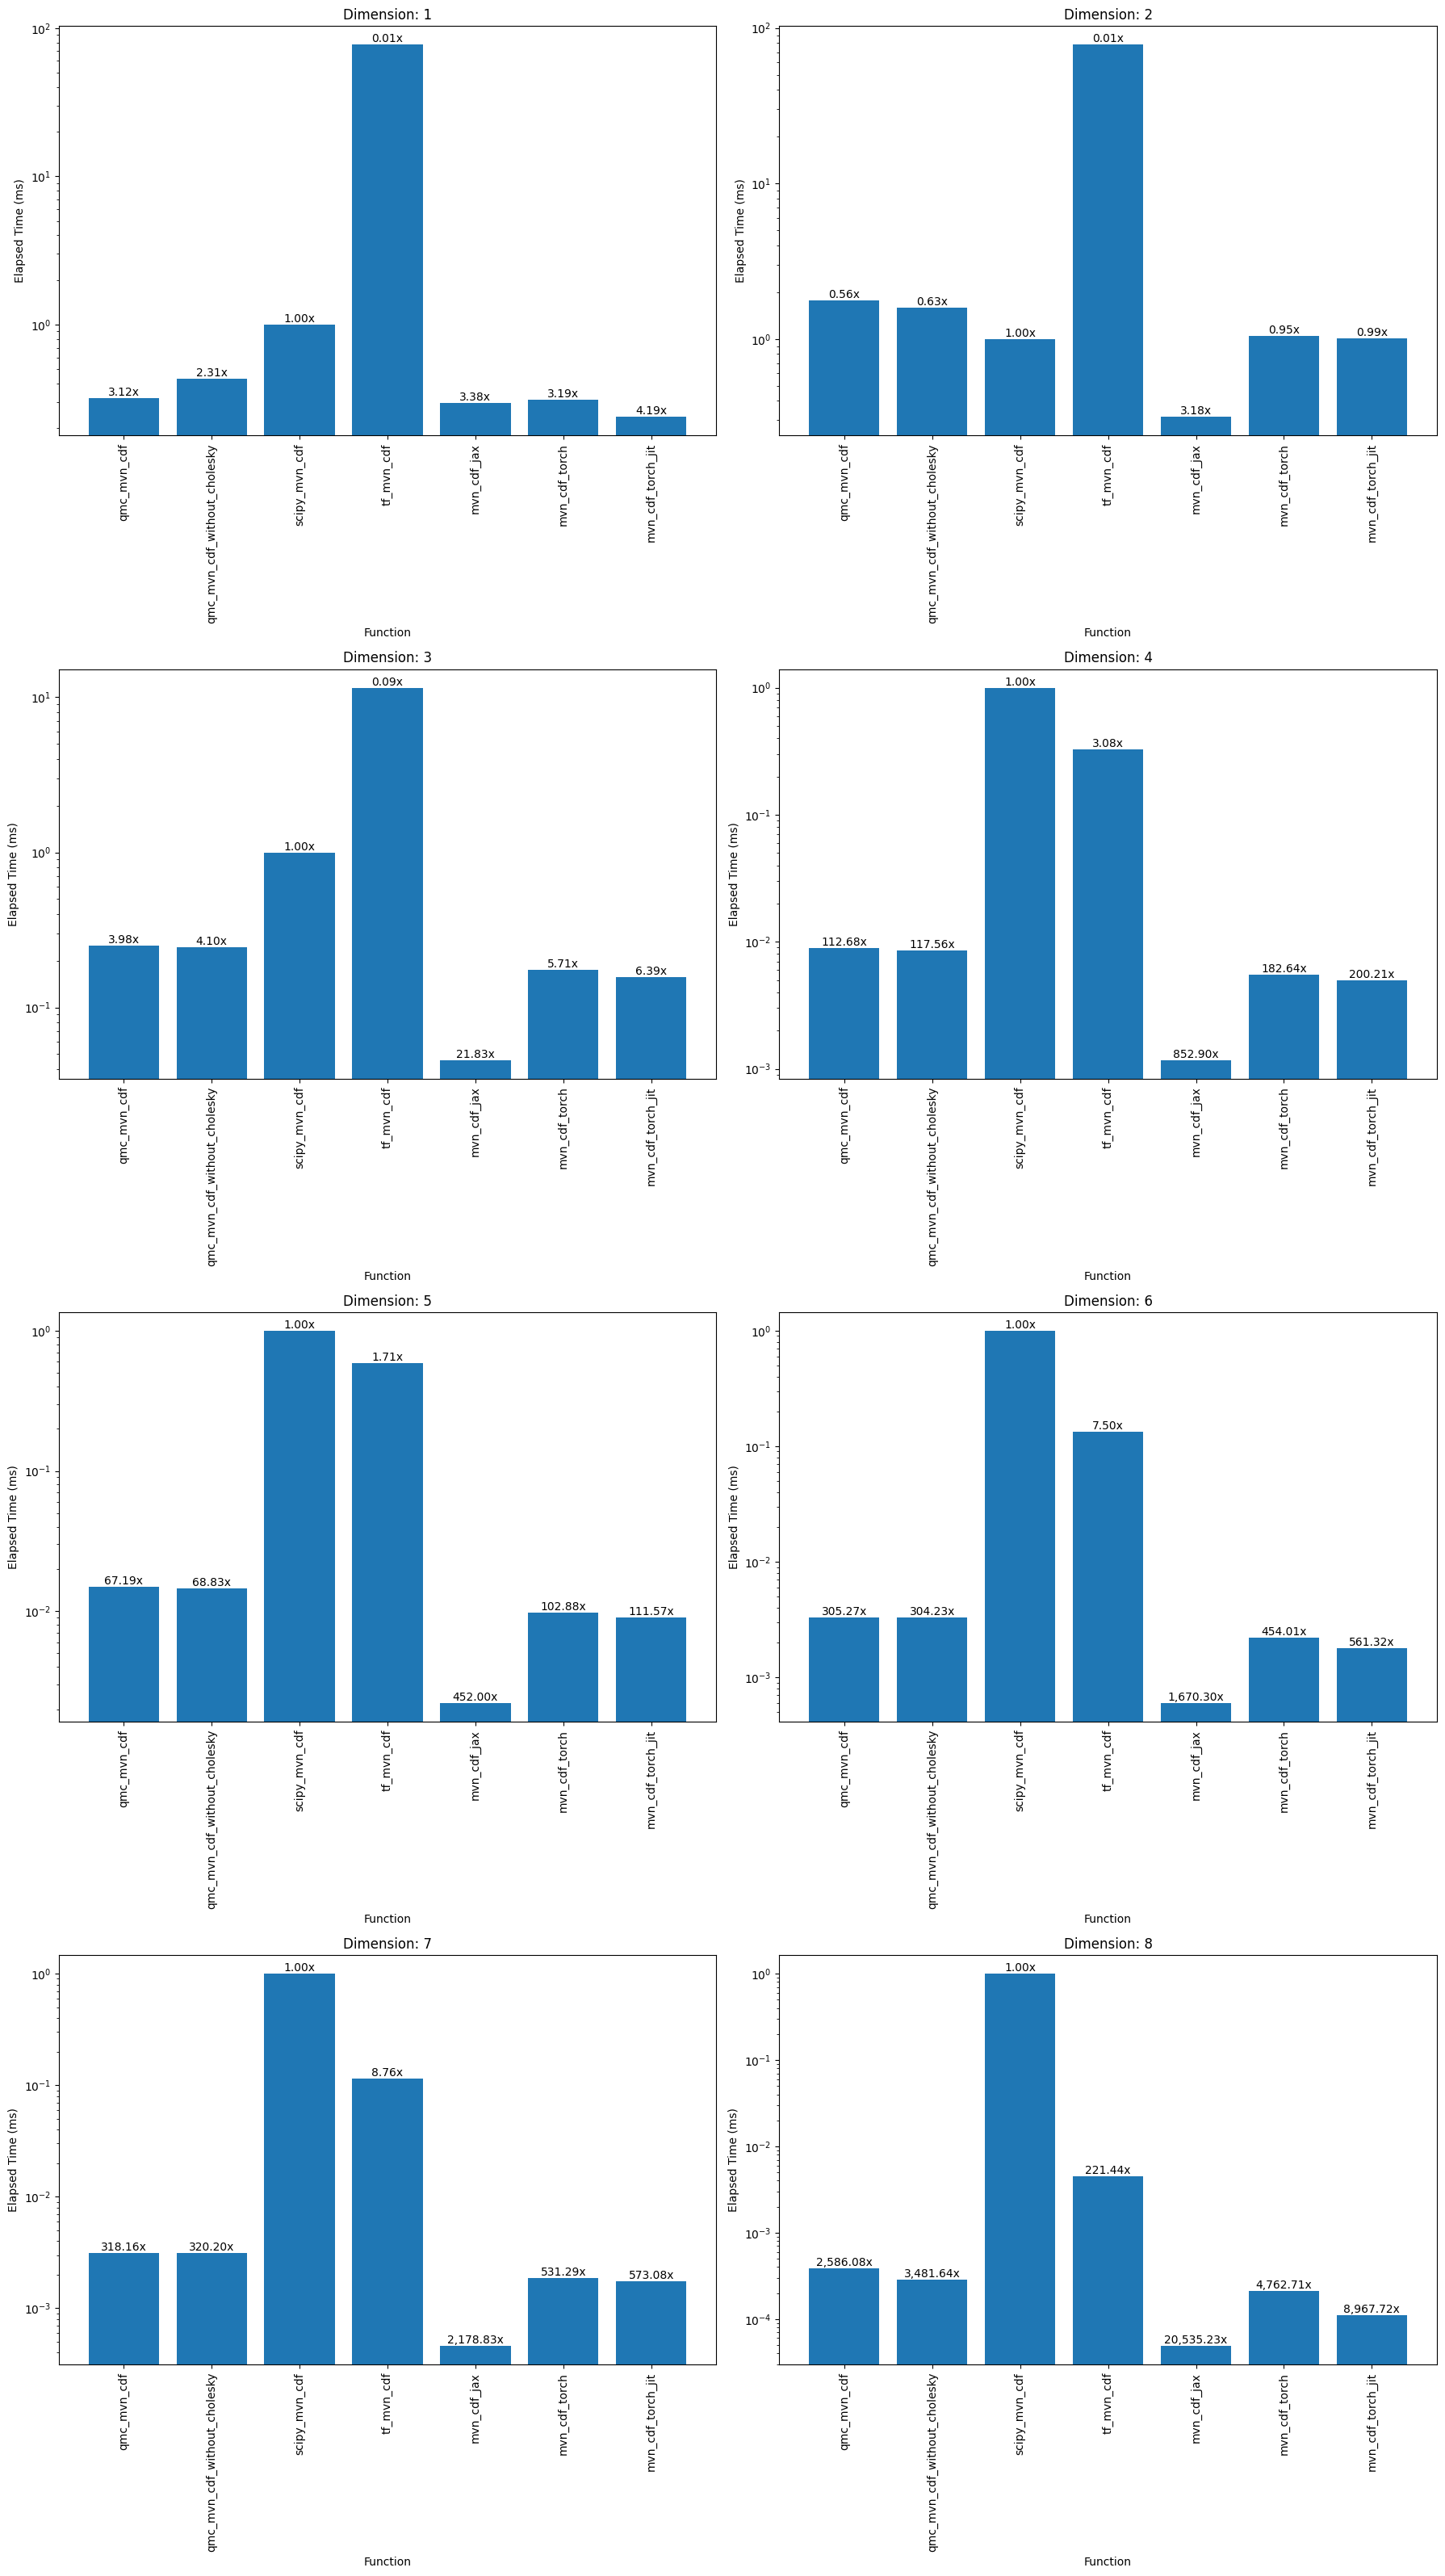

In [3]:
# Bar plot of the elapsed times for each function and dimension
dimensions = list(elapsed_times.keys())
functions = list(elapsed_times[dimensions[0]].keys())

# Create a bar plot of the elapsed times for each function and dimension
plt.figure(figsize=(18, 4 * len(dimensions)))

for dim in dimensions:
    plt.subplot(len(dimensions) // 2, 2, dimensions.index(dim) + 1)
    
    y = []
    baseline = elapsed_times[dim]["scipy_mvn_cdf"]
    for func in functions:
        y.append(elapsed_times[dim][func] / baseline)
    plt.bar(functions, y)

    # Annotate the bars with the elapsed time
    for i, func in enumerate(functions):
        plt.text(i, y[i], f"{(1/y[i]):,.2f}x", ha="center", va="bottom")

    plt.title(f"Dimension: {dim}")
    plt.xlabel("Function")
    plt.ylabel("Elapsed Time (ms)")
    plt.yscale("log")
    # Rotate the x labels
    plt.xticks(rotation=90)

plt.tight_layout()

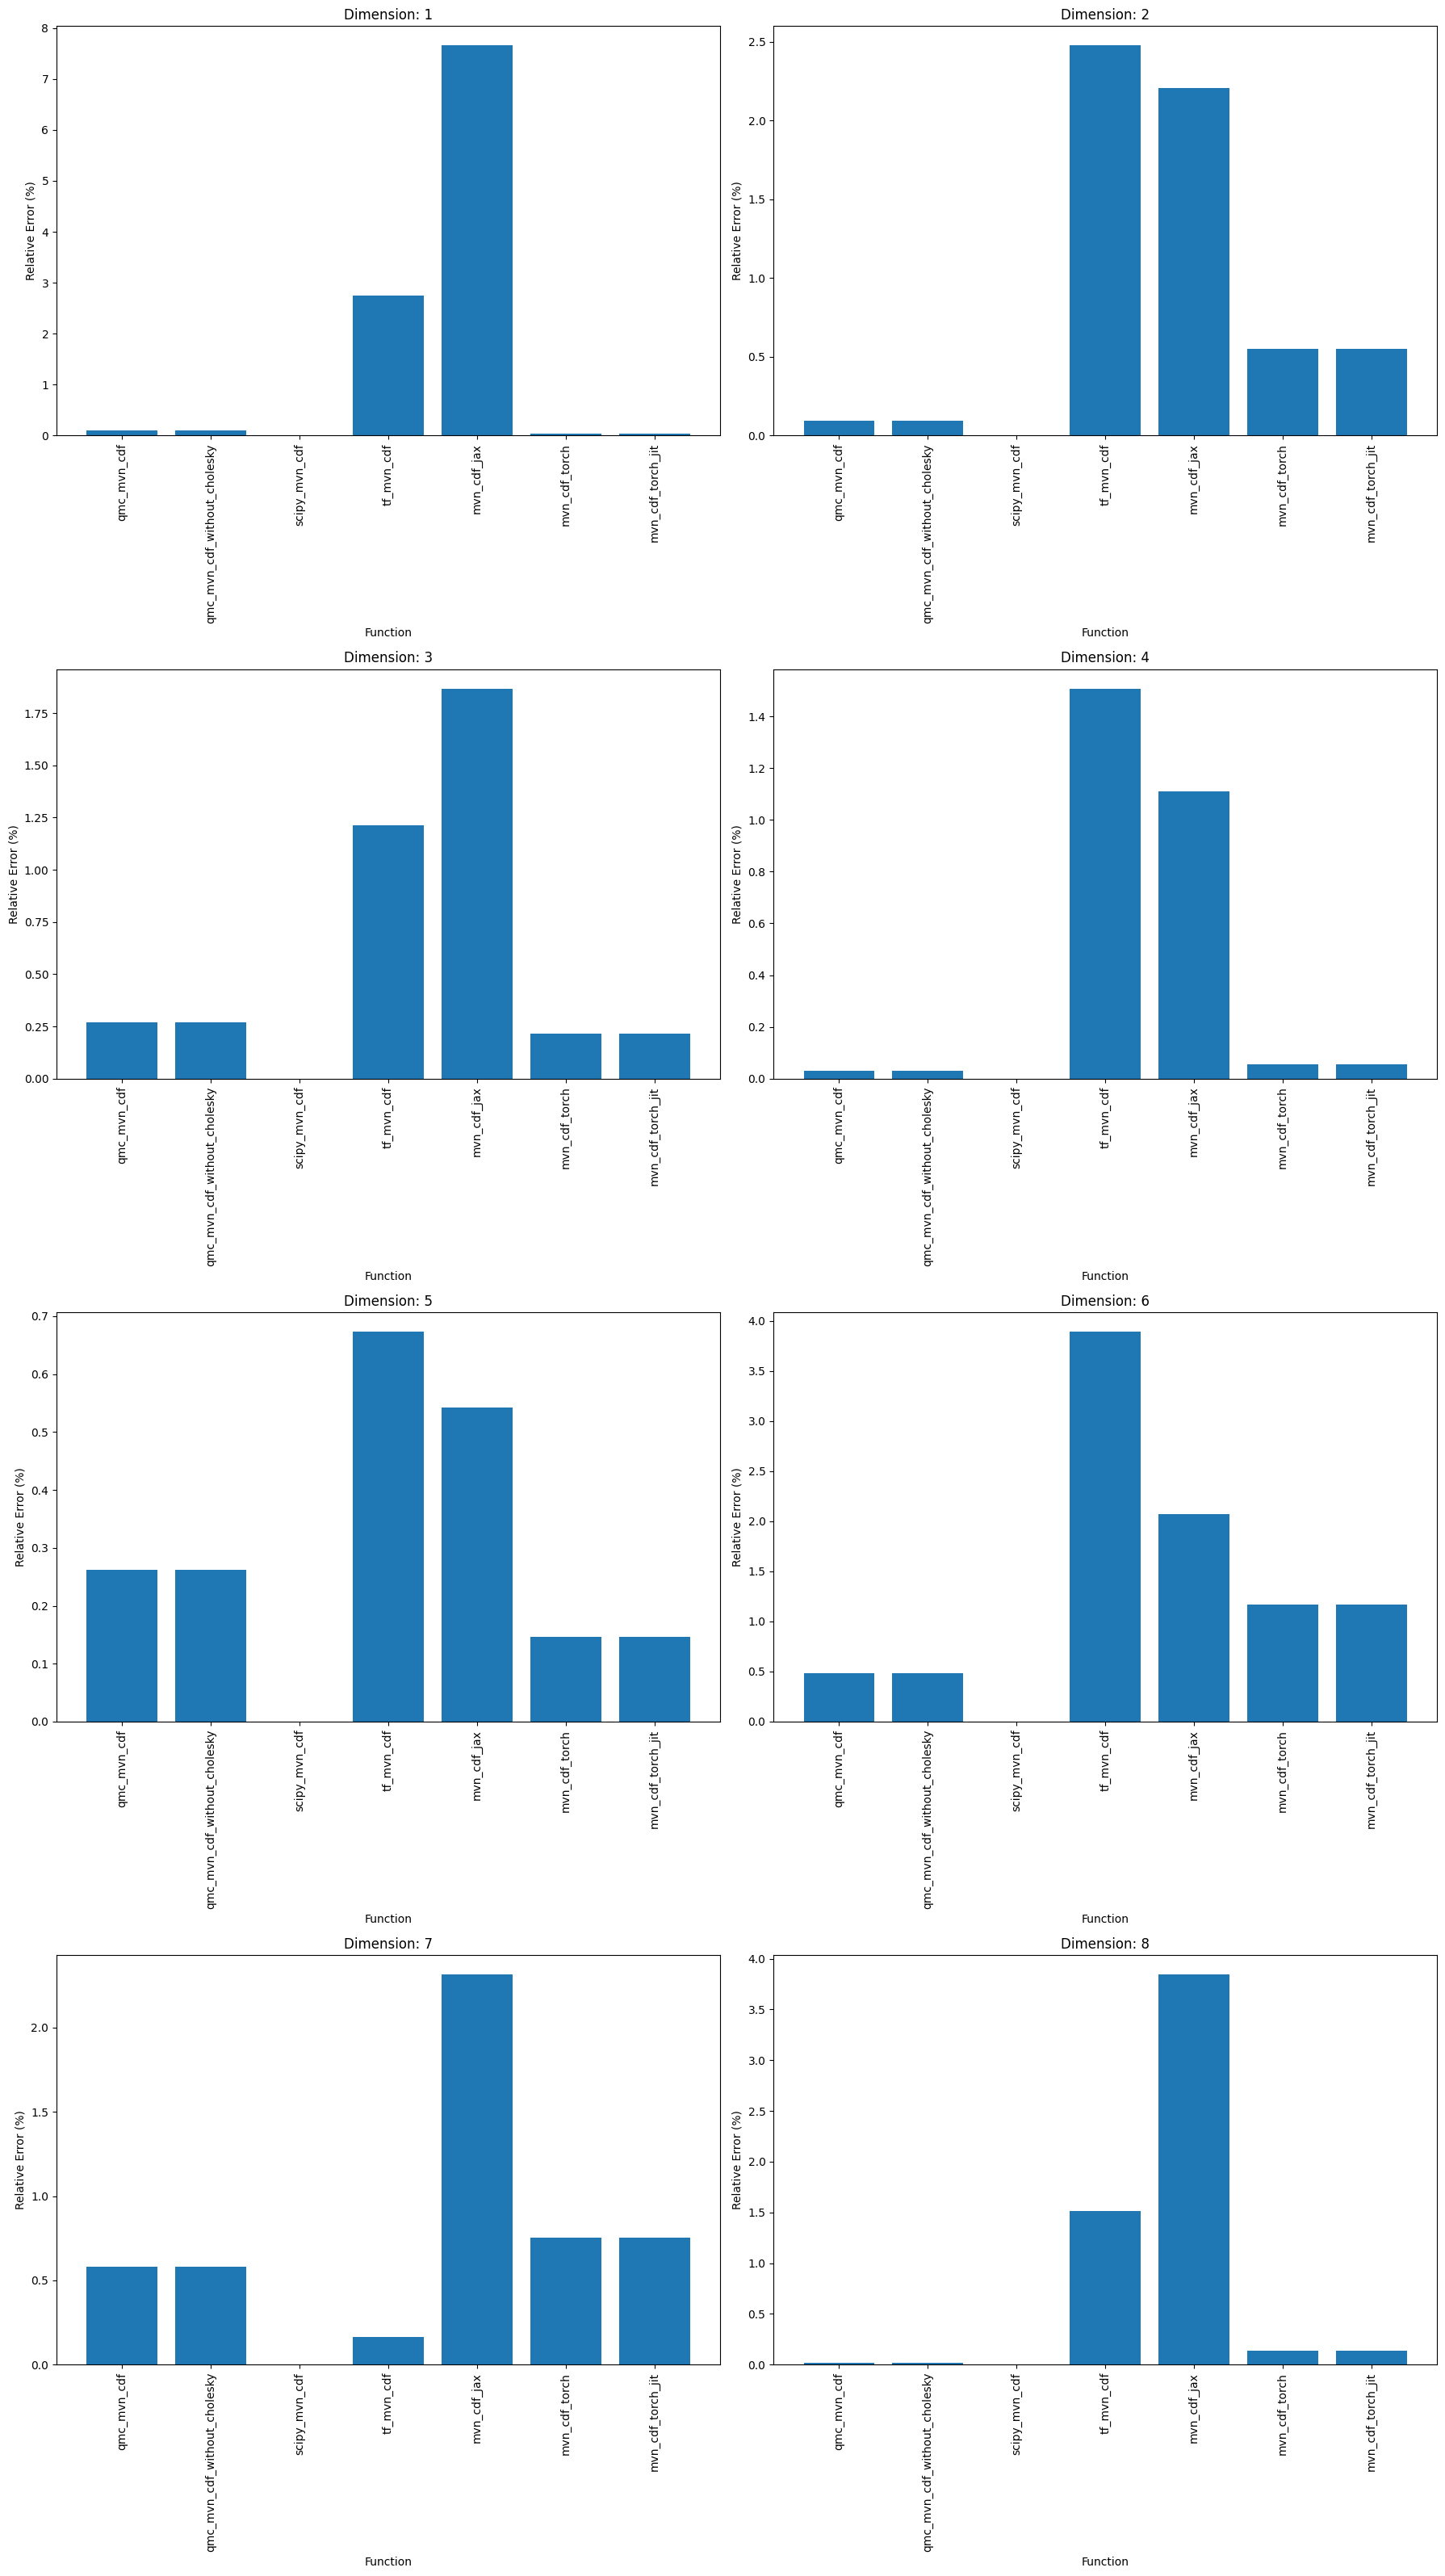

In [4]:
# Accuracy of each function with respect to the scipy implementation
plt.figure(figsize=(18, 4 * len(dimensions)))

for dim in dimensions:
    y = []
    plt.subplot(len(dimensions) // 2, 2, dimensions.index(dim) + 1)

    for func in functions:
        results_func = results[dim][func]
        results_scipy = results[dim]["scipy_mvn_cdf"]

        rel_error = np.abs(results_func - results_scipy) / results_scipy
        rel_error_in_percent = rel_error * 100
        y.append(rel_error_in_percent)

    plt.bar(functions, y)

    plt.title(f"Dimension: {dim}")
    plt.xlabel("Function")
    plt.ylabel("Relative Error (%)")
    plt.xticks(rotation=90)

plt.tight_layout()